In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

#Andreya's path
#path = "C:\\Users\\andre\\OneDrive\\Desktop\\University\\CITY - 3 YEAR\\Intro to AI\\Coursework"
#Mousuf's path
path = "C:\\Users\\mousu\\Documents\\GitHub\\Ai-Coursework-T3"
#STEFAN PATH DONT DELETE PLS
#path = "C:\\Users\\stefa\\OneDrive\\Documents\\Ai-Coursework-T3"
    
#load from file
filename_read = os.path.join(path, "Dataset_Kmeans_Clustering_csv.csv")
df = pd.read_csv(filename_read)
df = pd.read_csv(filename_read, na_values=['NA', '?'])

In [25]:
#divide the dataset into individual columns
column_t1_summoner1_role = df["t1_summoner1_role"]
column_t1_summoner2_role = df["t1_summoner2_role"]
column_t1_summoner3_role = df["t1_summoner3_role"]
column_t1_summoner4_role = df["t1_summoner4_role"]
column_t1_summoner5_role = df["t1_summoner5_role"]

column_t1_summoner1_mastery_points = df["t1_mast1"]
column_t1_summoner2_mastery_points = df["t1_mast2"]
column_t1_summoner3_mastery_points = df["t1_mast3"]
column_t1_summoner4_mastery_points = df["t1_mast4"]
column_t1_summoner5_mastery_points = df["t1_mast5"]

column_t2_summoner1_role = df["t2_summoner1_role"]
column_t2_summoner2_role = df["t2_summoner2_role"]
column_t2_summoner3_role = df["t2_summoner3_role"]
column_t2_summoner4_role = df["t2_summoner4_role"]
column_t2_summoner5_role = df["t2_summoner5_role"]

column_t2_summoner1_mastery_points = df["t2_mast1"]
column_t2_summoner2_mastery_points = df["t2_mast2"]
column_t2_summoner3_mastery_points = df["t2_mast3"]
column_t2_summoner4_mastery_points = df["t2_mast4"]
column_t2_summoner5_mastery_points = df["t2_mast5"]

column_winner = df["winner"]

#merge each team 1 player's column with his mastery points
summoner1_frame = [column_t1_summoner1_role, column_t1_summoner1_mastery_points]
summoner2_frame = [column_t1_summoner2_role, column_t1_summoner2_mastery_points]
summoner3_frame = [column_t1_summoner3_role, column_t1_summoner3_mastery_points]
summoner4_frame = [column_t1_summoner4_role, column_t1_summoner4_mastery_points]
summoner5_frame = [column_t1_summoner5_role, column_t1_summoner5_mastery_points]


#merge each team 2 player's column with his mastery points
summoner1_frame = [column_t2_summoner1_role, column_t2_summoner1_mastery_points]
summoner2_frame = [column_t2_summoner2_role, column_t2_summoner2_mastery_points]
summoner3_frame = [column_t2_summoner3_role, column_t2_summoner3_mastery_points]
summoner4_frame = [column_t2_summoner4_role, column_t2_summoner4_mastery_points]
summoner5_frame = [column_t2_summoner5_role, column_t2_summoner5_mastery_points]

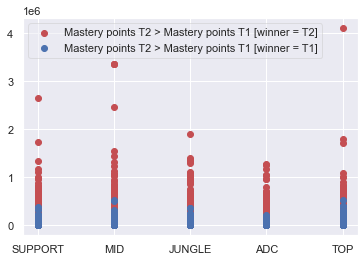

In [26]:
#merging each summoner 1 from both teams's position column with his mastery point column
t2_s1_merge = pd.merge(column_t2_summoner1_role , column_t2_summoner1_mastery_points, right_index=True, left_index=True)
t1_s1_merge = pd.merge(column_t1_summoner1_role , column_t1_summoner1_mastery_points, right_index=True, left_index=True)
s1_result = pd.merge(t2_s1_merge, t1_s1_merge, right_index=True, left_index=True) 

#locating where t2 summoner 1 player has greater amount of mastery points
t2_greater_mp = s1_result.loc[s1_result['t2_mast1'] > s1_result['t1_mast1']]

#comparing with original data(winner)
t2_greater_mp_winner = pd.merge(t2_greater_mp, column_winner, right_index=True, left_index=True)

#Only when Team 2 are winners(no matter mastery points difference)
only_t2_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t2"]

#Only when Team 1 are winners(no matter mastery points difference)
only_t1_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t1"]


fig = plt.figure()
ax1 = fig.add_subplot(111)
#Team 2 wins when they have more mastery points
ax1.scatter(only_t2_winner['t2_summoner1_role'],only_t2_winner['t2_mast1'], c='r')
#Team 1 wins despite that they have more mastery points
ax1.scatter(only_t1_winner['t1_summoner1_role'],only_t1_winner['t1_mast1'], c='b')
leg = plt.legend(loc='upper left', labels=["Mastery points T2 > Mastery points T1 [winner = T2]", "Mastery points T2 > Mastery points T1 [winner = T1]"])
leg.get_frame().set_alpha(0.5)
plt.show()

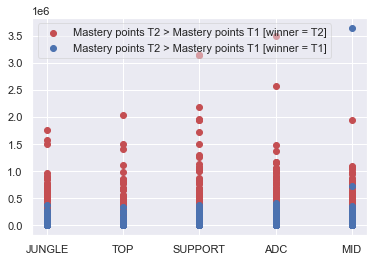

In [27]:
#merging each summoner 2 from both teams's position column with his mastery point column
t2_s2_merge = pd.merge(column_t2_summoner2_role , column_t2_summoner2_mastery_points, right_index=True, left_index=True)
t1_s2_merge = pd.merge(column_t1_summoner2_role , column_t1_summoner2_mastery_points, right_index=True, left_index=True)
s2_result = pd.merge(t2_s2_merge, t1_s2_merge, right_index=True, left_index=True) 

#locating where t2 summoner 2 player has greater amount of mastery points
t2_greater_mp = s2_result.loc[s2_result['t2_mast2'] > s2_result['t1_mast2']]

#comparing with original data(winner)
t2_greater_mp_winner = pd.merge(t2_greater_mp, column_winner, right_index=True, left_index=True)

#Only when Team 2 are winners(no matter mastery points difference)
only_t2_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t2"]

#Only when Team 1 are winners(no matter mastery points difference)
only_t1_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t1"]


fig = plt.figure()
ax1 = fig.add_subplot(111)
#Team 2 wins when they have more mastery points
ax1.scatter(only_t2_winner['t2_summoner2_role'],only_t2_winner['t2_mast2'], c='r')
#Team 1 wins despite that they have more mastery points
ax1.scatter(only_t1_winner['t1_summoner2_role'],only_t1_winner['t1_mast2'], c='b')
leg = plt.legend(loc='upper left', labels=["Mastery points T2 > Mastery points T1 [winner = T2]", "Mastery points T2 > Mastery points T1 [winner = T1]"])
leg.get_frame().set_alpha(0.5)
plt.show()

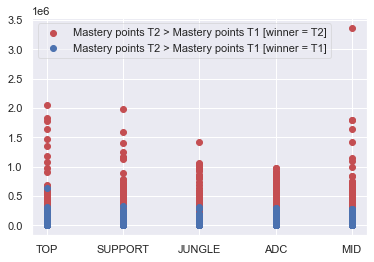

In [28]:
#merging each summoner 3 from both teams's position column with his mastery point column
t2_s3_merge = pd.merge(column_t2_summoner3_role , column_t2_summoner3_mastery_points, right_index=True, left_index=True)
t1_s3_merge = pd.merge(column_t1_summoner3_role , column_t1_summoner3_mastery_points, right_index=True, left_index=True)
s3_result = pd.merge(t2_s3_merge, t1_s3_merge, right_index=True, left_index=True) 

#locating where t2 summoner 3 player has greater amount of mastery points
t2_greater_mp = s3_result.loc[s3_result['t2_mast3'] > s3_result['t1_mast3']]

#comparing with original data(winner)
t2_greater_mp_winner = pd.merge(t2_greater_mp, column_winner, right_index=True, left_index=True)

#Only when Team 2 are winners(no matter mastery points difference)
only_t2_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t2"]

#Only when Team 1 are winners(no matter mastery points difference)
only_t1_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t1"]


fig = plt.figure()
ax1 = fig.add_subplot(111)
#Team 2 wins when they have more mastery points
ax1.scatter(only_t2_winner['t2_summoner3_role'],only_t2_winner['t2_mast3'], c='r')
#Team 1 wins despite that they have more mastery points
ax1.scatter(only_t1_winner['t1_summoner3_role'],only_t1_winner['t1_mast3'], c='b')
leg = plt.legend(loc='upper left', labels=["Mastery points T2 > Mastery points T1 [winner = T2]", "Mastery points T2 > Mastery points T1 [winner = T1]"])
leg.get_frame().set_alpha(0.5)
plt.show()

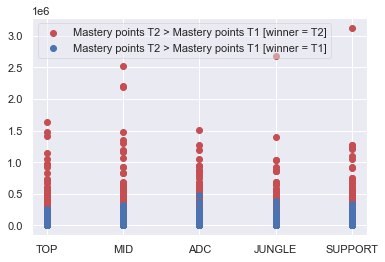

In [29]:
#merging each summoner 4 from both teams's position column with his mastery point column
t2_s4_merge = pd.merge(column_t2_summoner4_role , column_t2_summoner4_mastery_points, right_index=True, left_index=True)
t1_s4_merge = pd.merge(column_t1_summoner4_role , column_t1_summoner4_mastery_points, right_index=True, left_index=True)
s4_result = pd.merge(t2_s4_merge, t1_s4_merge, right_index=True, left_index=True) 

#locating where t2 summoner 4 player has greater amount of mastery points
t2_greater_mp = s4_result.loc[s4_result['t2_mast4'] > s4_result['t1_mast4']]

#comparing with original data(winner)
t2_greater_mp_winner = pd.merge(t2_greater_mp, column_winner, right_index=True, left_index=True)

#Only when Team 2 are winners(no matter mastery points difference)
only_t2_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t2"]

#Only when Team 1 are winners(no matter mastery points difference)
only_t1_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t1"]


fig = plt.figure()
ax1 = fig.add_subplot(111)
#Team 2 wins when they have more mastery points
ax1.scatter(only_t2_winner['t2_summoner4_role'],only_t2_winner['t2_mast4'], c='r')
#Team 1 wins despite that they have more mastery points
ax1.scatter(only_t1_winner['t1_summoner4_role'],only_t1_winner['t1_mast4'], c='b')
leg = plt.legend(loc='upper left', labels=["Mastery points T2 > Mastery points T1 [winner = T2]", "Mastery points T2 > Mastery points T1 [winner = T1]"])
leg.get_frame().set_alpha(0.5)
plt.show()

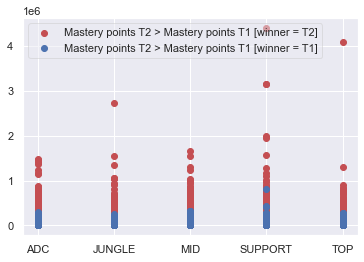

In [30]:
#merging each summoner 5 from both teams's position column with his mastery point column
t2_s5_merge = pd.merge(column_t2_summoner5_role , column_t2_summoner5_mastery_points, right_index=True, left_index=True)
t1_s5_merge = pd.merge(column_t1_summoner5_role , column_t1_summoner5_mastery_points, right_index=True, left_index=True)
s5_result = pd.merge(t2_s5_merge, t1_s5_merge, right_index=True, left_index=True) 

#locating where t2 summoner 5 player has greater amount of mastery points
t2_greater_mp = s5_result.loc[s5_result['t2_mast5'] > s5_result['t1_mast5']]

#comparing with original data(winner)
t2_greater_mp_winner = pd.merge(t2_greater_mp, column_winner, right_index=True, left_index=True)

#Only when Team 2 are winners(no matter mastery points difference)
only_t2_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t2"]

#Only when Team 1 are winners(no matter mastery points difference)
only_t1_winner = t2_greater_mp_winner.loc[t2_greater_mp_winner['winner'] == "t1"]


fig = plt.figure()
ax1 = fig.add_subplot(111)
#Team 2 wins when they have more mastery points
ax1.scatter(only_t2_winner['t2_summoner5_role'],only_t2_winner['t2_mast5'], c='r')
#Team 1 wins despite that they have more mastery points
ax1.scatter(only_t1_winner['t1_summoner5_role'],only_t1_winner['t1_mast5'], c='b')
leg = plt.legend(loc='upper left', labels=["Mastery points T2 > Mastery points T1 [winner = T2]", "Mastery points T2 > Mastery points T1 [winner = T1]"])
leg.get_frame().set_alpha(0.5)
plt.show()

In [31]:
#merging the required features into the desired dataset
X = pd.merge(s1_result, s2_result, right_index=True, left_index=True)
X = pd.merge(X, s3_result, right_index=True, left_index=True)
X = pd.merge(X, s4_result, right_index=True, left_index=True)
X = pd.merge(X, s5_result, right_index=True, left_index=True)

y = column_winner

In [32]:
#Indexing non numeric values
#Team: 1; Position: TOP
X['t1_summoner1_role'] = X['t1_summoner1_role'].replace('TOP', 0)
X['t1_summoner2_role'] = X['t1_summoner2_role'].replace('TOP', 0)
X['t1_summoner3_role'] = X['t1_summoner3_role'].replace('TOP', 0)
X['t1_summoner4_role'] = X['t1_summoner4_role'].replace('TOP', 0)
X['t1_summoner5_role'] = X['t1_summoner5_role'].replace('TOP', 0)

#Team: 2; Position: TOP
X['t2_summoner1_role'] = X['t2_summoner1_role'].replace('TOP', 0)
X['t2_summoner2_role'] = X['t2_summoner2_role'].replace('TOP', 0)
X['t2_summoner3_role'] = X['t2_summoner3_role'].replace('TOP', 0)
X['t2_summoner4_role'] = X['t2_summoner4_role'].replace('TOP', 0)
X['t2_summoner5_role'] = X['t2_summoner5_role'].replace('TOP', 0)



#Team: 1; Position: JUNGLE
X['t1_summoner1_role'] = X['t1_summoner1_role'].replace('JUNGLE', 1)
X['t1_summoner2_role'] = X['t1_summoner2_role'].replace('JUNGLE', 1)
X['t1_summoner3_role'] = X['t1_summoner3_role'].replace('JUNGLE', 1)
X['t1_summoner4_role'] = X['t1_summoner4_role'].replace('JUNGLE', 1)
X['t1_summoner5_role'] = X['t1_summoner5_role'].replace('JUNGLE', 1)

#Team: 2; Position: JUNGLE
X['t2_summoner1_role'] = X['t2_summoner1_role'].replace('JUNGLE', 1)
X['t2_summoner2_role'] = X['t2_summoner2_role'].replace('JUNGLE', 1)
X['t2_summoner3_role'] = X['t2_summoner3_role'].replace('JUNGLE', 1)
X['t2_summoner4_role'] = X['t2_summoner4_role'].replace('JUNGLE', 1)
X['t2_summoner5_role'] = X['t2_summoner5_role'].replace('JUNGLE', 1)



#Team: 1; Position: MID
X['t1_summoner1_role'] = X['t1_summoner1_role'].replace('MID', 2)
X['t1_summoner2_role'] = X['t1_summoner2_role'].replace('MID', 2)
X['t1_summoner3_role'] = X['t1_summoner3_role'].replace('MID', 2)
X['t1_summoner4_role'] = X['t1_summoner4_role'].replace('MID', 2)
X['t1_summoner5_role'] = X['t1_summoner5_role'].replace('MID', 2)

#Team: 2; Position: MID
X['t2_summoner1_role'] = X['t2_summoner1_role'].replace('MID', 2)
X['t2_summoner2_role'] = X['t2_summoner2_role'].replace('MID', 2)
X['t2_summoner3_role'] = X['t2_summoner3_role'].replace('MID', 2)
X['t2_summoner4_role'] = X['t2_summoner4_role'].replace('MID', 2)
X['t2_summoner5_role'] = X['t2_summoner5_role'].replace('MID', 2)



#Team: 1; Position: ADC
X['t1_summoner1_role'] = X['t1_summoner1_role'].replace('ADC', 3)
X['t1_summoner2_role'] = X['t1_summoner2_role'].replace('ADC', 3)
X['t1_summoner3_role'] = X['t1_summoner3_role'].replace('ADC', 3)
X['t1_summoner4_role'] = X['t1_summoner4_role'].replace('ADC', 3)
X['t1_summoner5_role'] = X['t1_summoner5_role'].replace('ADC', 3)

#Team: 2; Position: ADC
X['t2_summoner1_role'] = X['t2_summoner1_role'].replace('ADC', 3)
X['t2_summoner2_role'] = X['t2_summoner2_role'].replace('ADC', 3)
X['t2_summoner3_role'] = X['t2_summoner3_role'].replace('ADC', 3)
X['t2_summoner4_role'] = X['t2_summoner4_role'].replace('ADC', 3)
X['t2_summoner5_role'] = X['t2_summoner5_role'].replace('ADC', 3)



#Team: 1; Position: SUPPORT
X['t1_summoner1_role'] = X['t1_summoner1_role'].replace('SUPPORT', 4)
X['t1_summoner2_role'] = X['t1_summoner2_role'].replace('SUPPORT', 4)
X['t1_summoner3_role'] = X['t1_summoner3_role'].replace('SUPPORT', 4)
X['t1_summoner4_role'] = X['t1_summoner4_role'].replace('SUPPORT', 4)
X['t1_summoner5_role'] = X['t1_summoner5_role'].replace('SUPPORT', 4)

#Team: 2; Position: SUPPORT
X['t2_summoner1_role'] = X['t2_summoner1_role'].replace('SUPPORT', 4)
X['t2_summoner2_role'] = X['t2_summoner2_role'].replace('SUPPORT', 4)
X['t2_summoner3_role'] = X['t2_summoner3_role'].replace('SUPPORT', 4)
X['t2_summoner4_role'] = X['t2_summoner4_role'].replace('SUPPORT', 4)
X['t2_summoner5_role'] = X['t2_summoner5_role'].replace('SUPPORT', 4)



#Winner column
y = y.replace('t1', 1)
y = y.replace('t2', 2)

X_c = X

#Converting String values to Integers
imp = SimpleImputer(strategy="most_frequent")
X = imp.fit_transform(X)

In [33]:
#RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=200,max_depth=100,min_samples_split=30,n_estimators=120)
rf.fit(X_train,y_train)

#Success rate(predict who wins the game)
rf.score(X_test,y_test)

0.6363636363636364

In [34]:
#What have the model learned from the dataset
#How much each feature(column) determines the output
for col,val in sorted(
           zip(X_c.columns, rf.feature_importances_),
           key=lambda x: x[1],
           reverse=True,
   )[:]:
           print(f"{col:10}{val:10.3f}")

t2_mast4       0.094
t2_mast3       0.093
t1_mast5       0.090
t2_mast5       0.087
t1_mast1       0.087
t2_mast1       0.085
t1_mast4       0.083
t1_mast3       0.082
t2_mast2       0.080
t1_mast2       0.079
t2_summoner4_role     0.015
t1_summoner3_role     0.015
t1_summoner4_role     0.015
t1_summoner1_role     0.014
t1_summoner5_role     0.014
t2_summoner5_role     0.014
t2_summoner1_role     0.014
t2_summoner3_role     0.014
t1_summoner2_role     0.013
t2_summoner2_role     0.013


In [35]:
#LogisticRegression classifier: Attempted to improve the success rate
lr = LogisticRegression(random_state=42,tol=0.001)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5471458773784356

In [36]:
#KNeighbors classifier : Another attempt to increase the success rate
knc = KNeighborsClassifier(weights='distance')
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.5217758985200845

In [37]:
#Kmeans cluster : A third attempt to increase the success rate
kmeans = KMeans(n_clusters=118,random_state=42,max_iter=600)
kmeans.fit(X_train, y_train)
kmeans.score(X_test, y_test)

-104164872460033.97